In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [5]:
data['y'] = data['y'].replace(
    {'no': 0, 'yes': 1})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Категориальные фичи

<AxesSubplot:>

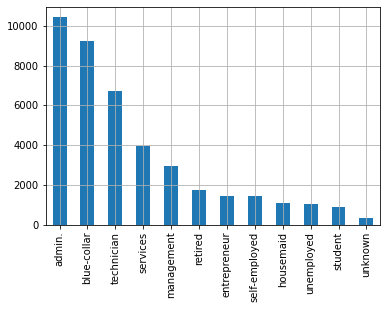

In [14]:
data.job.value_counts().plot(kind = 'bar', grid=True)

In [15]:
columns = data.columns.to_list()

In [22]:
cat_col = ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

Пройдемся по основным распределениям категориальных фич и проверим, нет ли там аномалий.

<AxesSubplot:>

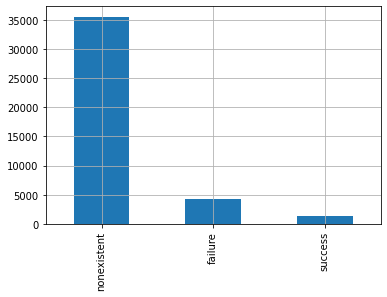

In [23]:
data['poutcome'].value_counts().plot(kind = 'bar', grid=True)

<AxesSubplot:>

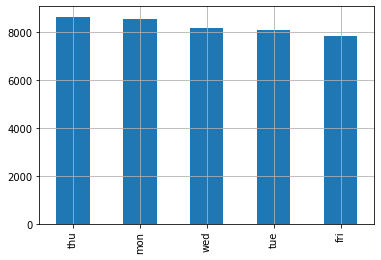

In [24]:
data['day_of_week'].value_counts().plot(kind = 'bar', grid=True)

<AxesSubplot:>

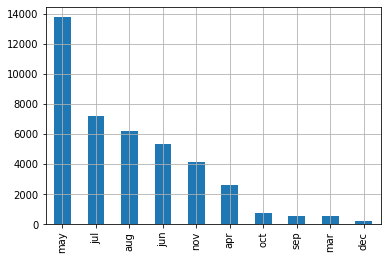

In [25]:
data['month'].value_counts().plot(kind = 'bar', grid=True)

<AxesSubplot:>

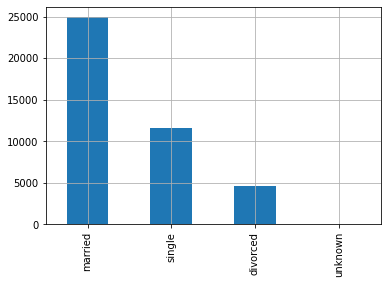

In [26]:
data['marital'].value_counts().plot(kind = 'bar', grid=True)

<AxesSubplot:>

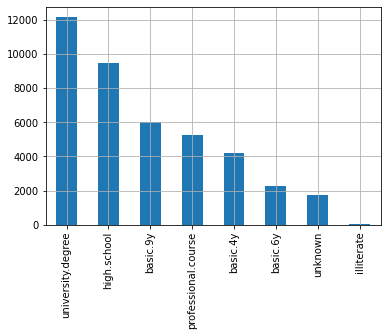

In [27]:
data['education'].value_counts().plot(kind = 'bar', grid=True)

<AxesSubplot:>

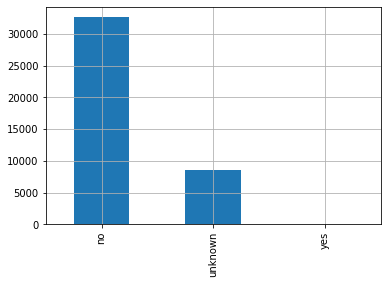

In [28]:
data['default'].value_counts().plot(kind = 'bar', grid=True)

<AxesSubplot:>

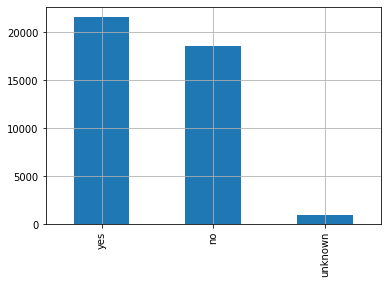

In [29]:
data['housing'].value_counts().plot(kind = 'bar', grid=True)

<AxesSubplot:>

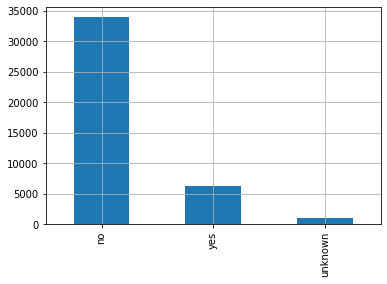

In [30]:
data['loan'].value_counts().plot(kind = 'bar', grid=True)

<AxesSubplot:>

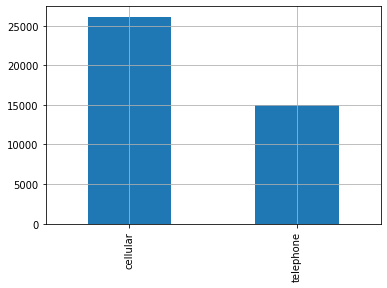

In [31]:
data['contact'].value_counts().plot(kind = 'bar', grid=True)

Пропусков в датасете нет, object - скорее всего категориальные переменные. Будем работать с CatboostClassifier

In [47]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
import seaborn as sns
from matplotlib import pyplot as plt

In [33]:
cat_features = ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

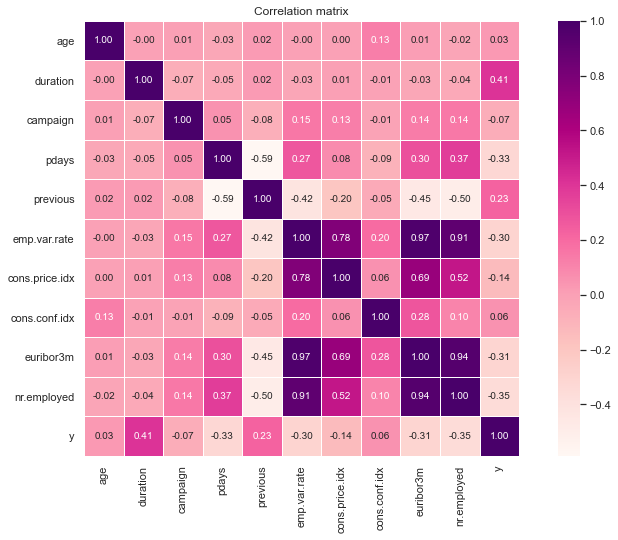

In [38]:
plt.figure(figsize = (14,8))

sns.set(font_scale=1)
sns.heatmap(data.corr().round(3), annot=True, square = True, linewidths=.75, cmap='RdPu', fmt = '.2f',annot_kws = {"size": 10} )

plt.title('Correlation matrix')
plt.show()

In [40]:
x_data = data.drop('y', axis=1)

In [43]:
y_data = data['y']

In [44]:
y_data.shape

(41188,)

In [42]:
x_data.shape

(41188, 20)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [50]:
params_cb = {"n_estimators":5000,
             "learning_rate": 0.1,
             "loss_function": "Logloss",
             "eval_metric": "AUC",
             "task_type": "CPU",
             "max_bin": 30,
             "early_stopping_rounds": 30,
             "verbose": 1000,
             "max_depth": 10,
             "l2_leaf_reg": 80,
             "thread_count": 6,
             "random_seed": 51} 

model_catboost = CatBoostClassifier(**params_cb)

In [53]:
dtrain = Pool(data=x_train, label=y_train, cat_features=cat_features) #, cat_features=categorical
dvalid = Pool(data=x_test, label=y_test, cat_features=cat_features) #, cat_features=categorical

In [54]:
model_catboost.fit(dtrain, eval_set=[dvalid])

0:	test: 0.9261188	best: 0.9261188 (0)	total: 491ms	remaining: 40m 52s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.9457119221
bestIteration = 83

Shrink model to first 84 iterations.


In [58]:
predictions_catboost = model_catboost.predict_proba(x_test)[:,-1]

In [59]:
predictions_catboost

array([0.00448764, 0.03553912, 0.02970466, ..., 0.00786302, 0.00165409,
       0.02954746])

In [61]:
y_test

6576     0
36038    1
18933    0
23756    0
3699     0
        ..
23840    0
18941    0
1273     0
2456     0
32374    0
Name: y, Length: 8238, dtype: int64

In [65]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

In [66]:
roc_auc_score(y_test, predictions_catboost)

0.9457119221139887

In [68]:
def get_classification_metric(y_test, probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))
    return thresholds[ix], fscore[ix], precision[ix], recall[ix]

In [69]:
get_classification_metric(y_test, predictions_catboost)

Best Threshold=0.302512, F-Score=0.648, Precision=0.556, Recall=0.776


(0.30251244000300526,
 0.6479003230272264,
 0.5562599049128367,
 0.7756906077348066)

### Теперь очередь за PU learning

In [ ]:
# Почему-то CatboostClassifier неважно отреагировал на лейбл -1 и стал выдавать ошибку. Пришлось написать 
# функцию трансформации наших данных. 

In [126]:
def transform_mod_data(mod_data):
    mod_data['job'] = mod_data['job'].replace(
    {'admin.': -1, 'retired': 0, 'blue-collar': 1, 'technician': 2, 'services': 3, 'management': 4, 
    'entrepreneur': 5, 'self-employed': 6, 'housemaid': 7, 'unemployed': 8, 'student': 9, 'unknown': 10})
    
    mod_data['marital'] = mod_data['marital'].replace(
    {'married': 0, 'single': 1, 'divorced': 2, 'unknown': 3})
    
    mod_data['education'] = mod_data['education'].replace(
    {'university.degree': 0, 'high.school': -1, 'basic.9y': 1, 'professional.course': 2, 'basic.4y': 3,
     'basic.6y': 4, 'unknown': 5, 'illiterate': 6})
    
    mod_data['default'] = mod_data['default'].replace(
    {'no': 1, 'unknown': 0, 'yes': 2})
    
    mod_data['housing'] = mod_data['housing'].replace(
    {'no': 1, 'unknown': 0, 'yes': 2})
    
    mod_data['loan'] = mod_data['loan'].replace(
    {'no': 1, 'unknown': 0, 'yes': 2})

    mod_data['contact'] = mod_data['contact'].replace(
    {'cellular': 1, 'telephone': 0})
    
    mod_data['month'] = mod_data['month'].replace(
    {'may': 1, 'jul': 2, 'aug': 3, 'jun': 4, 'nov': 5, 'apr': 6, 'oct': 7, 'sep': 8, 'mar': 9, 'dec': 10})
    
    mod_data['day_of_week'] = mod_data['day_of_week'].replace(
    {'thu': 1, 'mon': 2, 'wed': 3, 'tue': 4, 'fri': 5})
    
    mod_data['poutcome'] = mod_data['poutcome'].replace(
    {'nonexistent': 0, 'failure': 1, 'success': 2})
    
    return mod_data

In [127]:
mod_data = data.copy()

In [128]:
mod_data = transform_mod_data(mod_data)

In [129]:
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [130]:
#найдем индексы, для которых data['y'] == 1
pos_ind = np.where(mod_data.iloc[:,-1].values == 1)[0]
#перемешивание индексов
np.random.shuffle(pos_ind)
# возьмем выборку 25%
pos_sample_len = int(np.ceil(0.25 * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 1160/4640 as positives and unlabeling the rest


Создаем столбец для новой целевой переменной, где у нас два класса - P (1) и U (-1)

In [131]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_data.iloc[:,-1].value_counts())

target variable:
 -1    40028
 1     1160
Name: class_test, dtype: int64


In [132]:
mod_data.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,class_test
41178,62,0,0,0,1,1,1,1,5,1,...,6,3,2,-1.1,94.767,-50.8,1.031,4963.6,1,-1
41179,64,0,2,2,1,2,1,1,5,5,...,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0,-1
41180,36,-1,0,0,1,1,1,1,5,5,...,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0,-1
41181,37,-1,0,0,1,2,1,1,5,5,...,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1,-1
41182,29,8,1,3,1,2,1,1,5,5,...,9,1,2,-1.1,94.767,-50.8,1.028,4963.6,0,-1
41183,73,0,0,2,1,2,1,1,5,5,...,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1,-1
41184,46,1,0,2,1,1,1,1,5,5,...,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0,-1
41185,56,0,0,0,1,2,1,1,5,5,...,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0,-1
41186,44,2,0,2,1,1,1,1,5,5,...,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1,-1
41187,74,0,0,2,1,2,1,1,5,5,...,999,1,1,-1.1,94.767,-50.8,1.028,4963.6,0,-1


In [133]:
x_data = mod_data.iloc[:,:-2].values # just the X 
y_labeled = mod_data.iloc[:,-1].values # new class (just the P & U)
y_positive = mod_data.iloc[:,-2].values # original class

Применим random negative sampling

In [134]:
mod_data = mod_data.sample(frac=1)
neg_sample = mod_data[mod_data['class_test']==-1][:len(mod_data[mod_data['class_test']==1])]
sample_test = mod_data[mod_data['class_test']==-1][len(mod_data[mod_data['class_test']==1]):]
pos_sample = mod_data[mod_data['class_test']==1]
print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

(1160, 22) (1160, 22)


In [135]:
sample_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,class_test
20766,32,4,0,0,1,2,1,1,3,3,...,999,0,0,1.4,93.444,-36.1,4.965,5228.1,0,-1
39251,31,6,0,2,1,2,1,1,9,1,...,999,3,1,-1.8,93.369,-34.8,0.650,5008.7,1,1
23651,32,-1,0,0,1,2,1,1,3,1,...,999,0,0,1.4,93.444,-36.1,4.962,5228.1,0,-1
38431,56,0,0,2,1,0,0,1,7,1,...,6,1,2,-3.4,92.431,-26.9,0.733,5017.5,1,1
4398,49,-1,0,0,0,1,1,0,1,4,...,999,0,0,1.1,93.994,-36.4,4.856,5191.0,0,-1


In [136]:
model = xgb.XGBClassifier()
sample_train.loc[sample_train['class_test']==-1,'class_test']=0
model.fit(sample_train.iloc[:,:-2].values, 
          sample_train.iloc[:,-1].values)
y_predict = model.predict(sample_test.iloc[:,:-2].values)
evaluate_results(sample_test.iloc[:,-2].values, y_predict)

c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:49:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification results:
f1: 51.22%
recall: 88.30%
precision: 36.07%


In [137]:
!pip install pulearn

You should consider upgrading via the 'c:\users\anatoly\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [138]:
from pulearn import ElkanotoPuClassifier
# https://towardsdatascience.com/semi-supervised-classification-of-unlabeled-data-pu-learning-81f96e96f7cb
# https://cseweb.ucsd.edu/~elkan/posonly.pdf

from sklearn.svm import SVC




svc = SVC(C=10, kernel='rbf', gamma=0.4, probability=True)
pu_estimator = ElkanotoPuClassifier(estimator=svc, hold_out_ratio=0.2)

pu_estimator = ElkanotoPuClassifier(estimator=svc, hold_out_ratio=0.2)
pu_estimator.fit(sample_train.iloc[:,:-2].values, 
          sample_train.iloc[:,-1].values)

y_predict = pu_estimator.predict(sample_test.iloc[:,:-2].values)
y_test_ = (sample_test.iloc[:,-2].values)
evaluate_results(y_test_,(y_predict>0).astype(int))

Classification results:
f1: 16.01%
recall: 99.94%
precision: 8.70%


In [ ]:
# еще хуже по precision. 

## Сделаем все то же самое для выборки 50%

In [164]:
mod_data2 = data.copy()

In [165]:
mod_data2 = transform_mod_data(mod_data2)

In [166]:
#найдем индексы, для которых data['y'] == 1
pos_ind2 = np.where(mod_data2.iloc[:,-1].values == 1)[0]
#перемешивание индексов
np.random.shuffle(pos_ind2)
# возьмем выборку 50%
pos_sample_len2 = int(np.ceil(0.5 * len(pos_ind2)))
print(f'Using {pos_sample_len2}/{len(pos_ind2)} as positives and unlabeling the rest')
pos_sample2 = pos_ind2[:pos_sample_len2]

Using 2320/4640 as positives and unlabeling the rest


In [167]:
mod_data2['class_test'] = -1
mod_data2.loc[pos_sample2,'class_test'] = 1
print('target variable:\n', mod_data2.iloc[:,-1].value_counts())

target variable:
 -1    38868
 1     2320
Name: class_test, dtype: int64


In [168]:
x_data2 = mod_data2.iloc[:,:-2].values # just the X 
y_labeled2 = mod_data2.iloc[:,-1].values # new class (just the P & U)
y_positive2 = mod_data2.iloc[:,-2].values # original class

In [169]:
mod_data2 = mod_data2.sample(frac=1)
neg_sample2 = mod_data2[mod_data2['class_test']==-1][:len(mod_data2[mod_data2['class_test']==1])]
sample_test2 = mod_data2[mod_data2['class_test']==-1][len(mod_data2[mod_data2['class_test']==1]):]
pos_sample2 = mod_data2[mod_data2['class_test']==1]
print(neg_sample2.shape, pos_sample2.shape)
sample_train2 = pd.concat([neg_sample2, pos_sample2]).sample(frac=1)

(2320, 22) (2320, 22)


In [170]:
model2 = xgb.XGBClassifier()
sample_train2.loc[sample_train2['class_test']==-1,'class_test']=0
model2.fit(sample_train2.iloc[:,:-2].values, 
          sample_train2.iloc[:,-1].values)
y_predict2 = model2.predict(sample_test2.iloc[:,:-2].values)
evaluate_results(sample_test2.iloc[:,-2].values, y_predict2)

c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification results:
f1: 41.97%
recall: 90.03%
precision: 27.37%


In [ ]:
#Вырос охват, точность немного упала. Все-таки оптимально делать выборку 1:4, а не 1:2. 

In [173]:
def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 
    
    return f1, rec, prc